___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [2]:
# import all the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [4]:
# import dataset Churn_Modelling
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Data/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [8]:
# Implement basic steps to see how is your data looks like
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

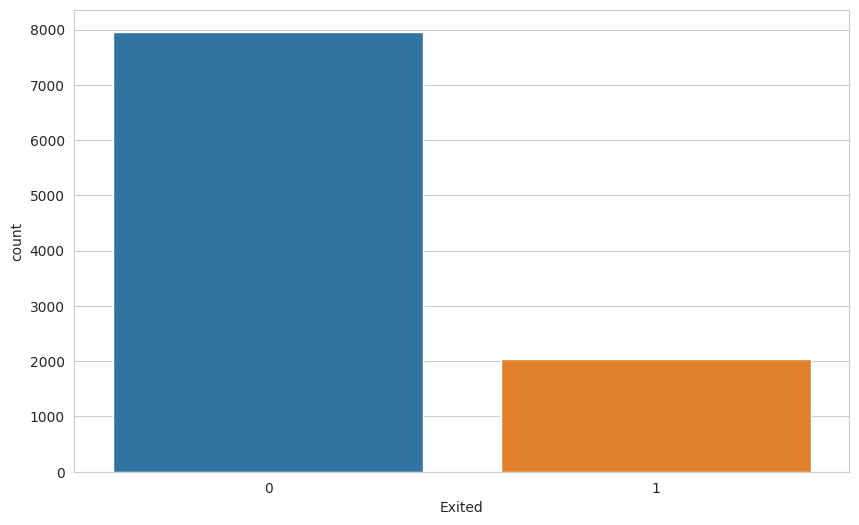

In [12]:
sns.countplot(x=df["Exited"])

<ipython-input-13-59c2e5680d09>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")


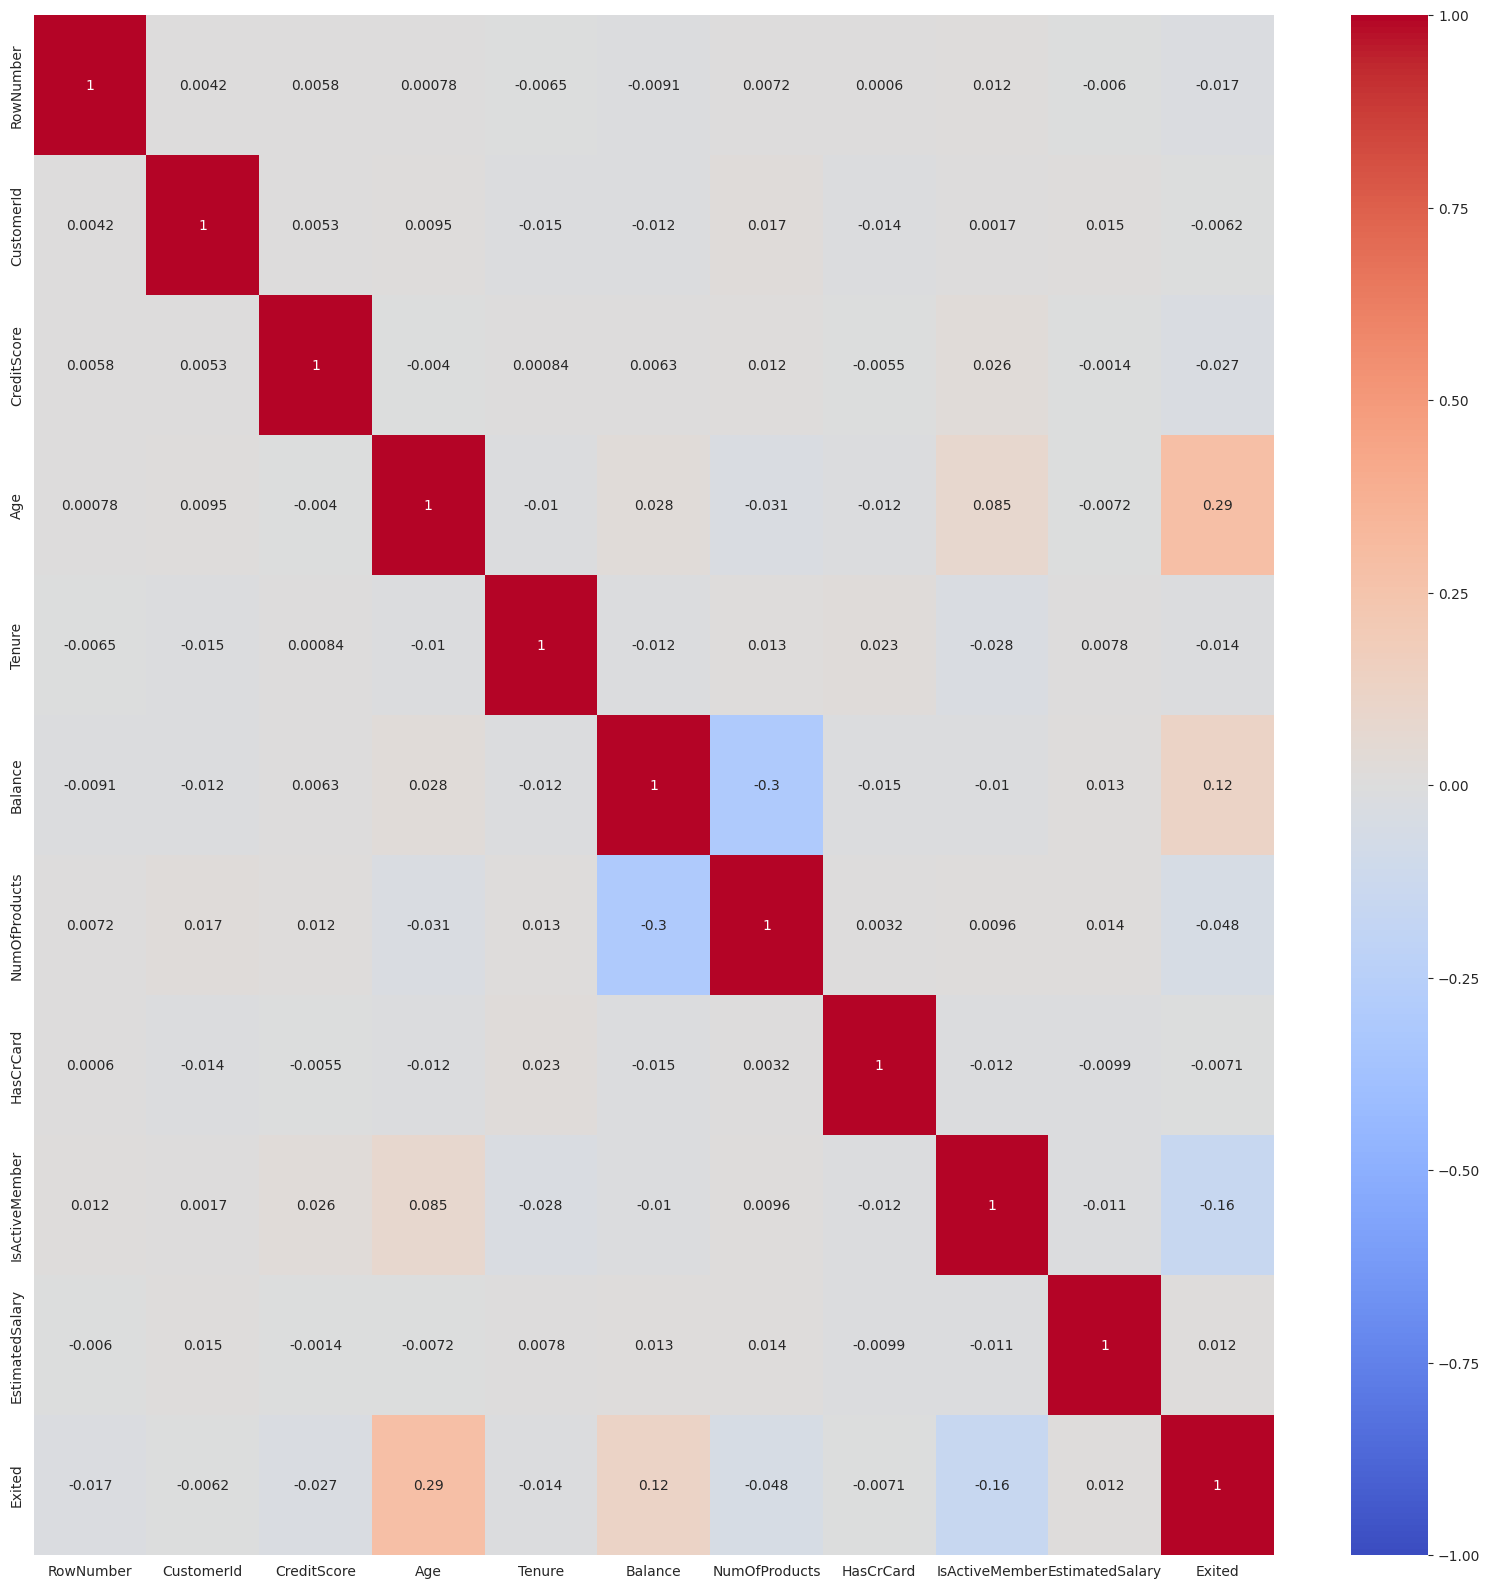

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

<ipython-input-14-49a6d830e862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")


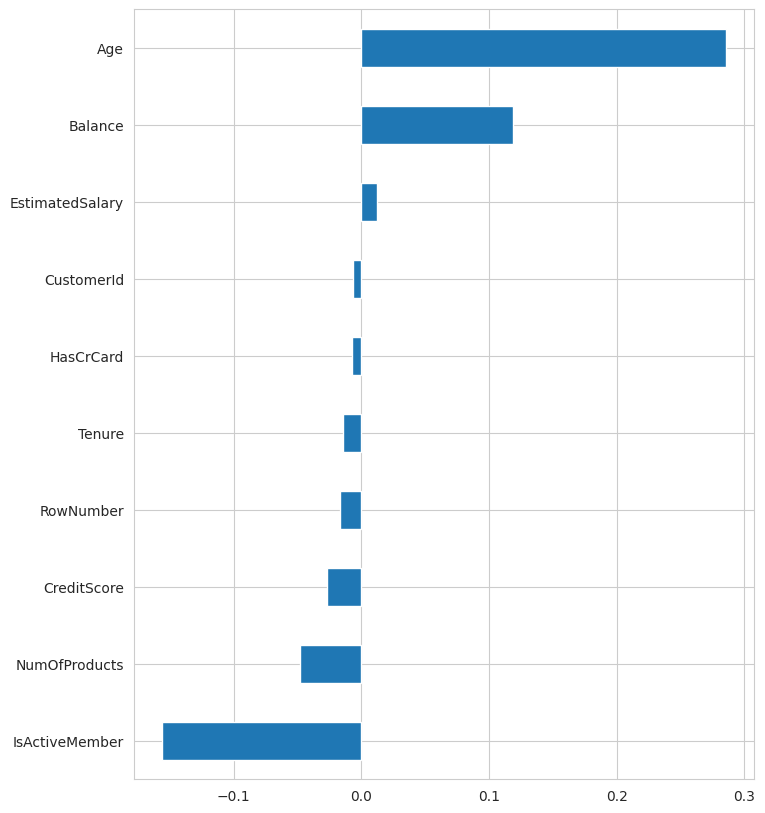

In [14]:
plt.figure(figsize=(8, 10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
plt.show()

Categorical Variables:
Index(['Surname', 'Geography', 'Gender'], dtype='object')
Numerical Variables:
['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
RowNumber
Skew : 0.0


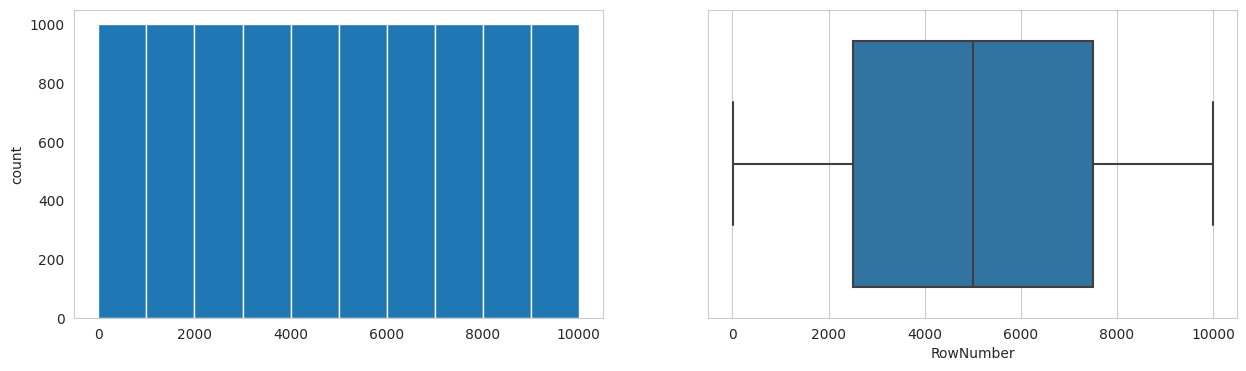

CustomerId
Skew : 0.0


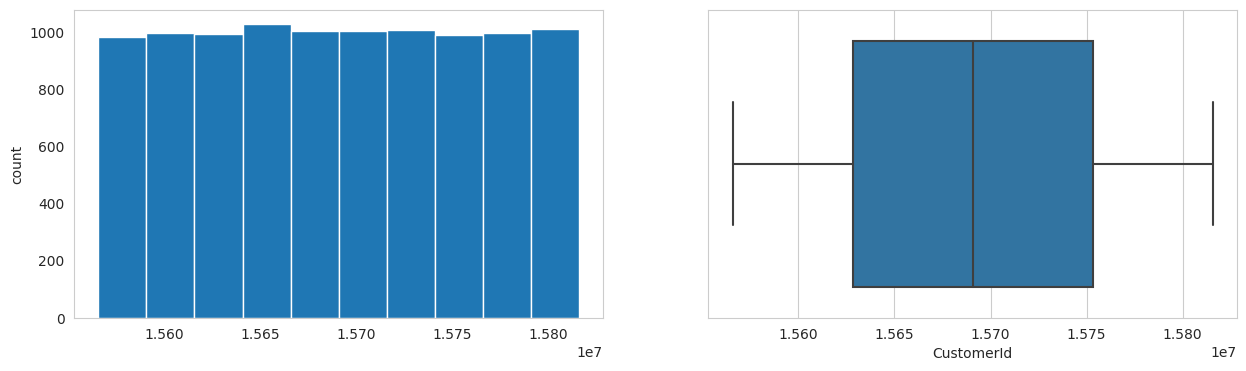

CreditScore
Skew : -0.07


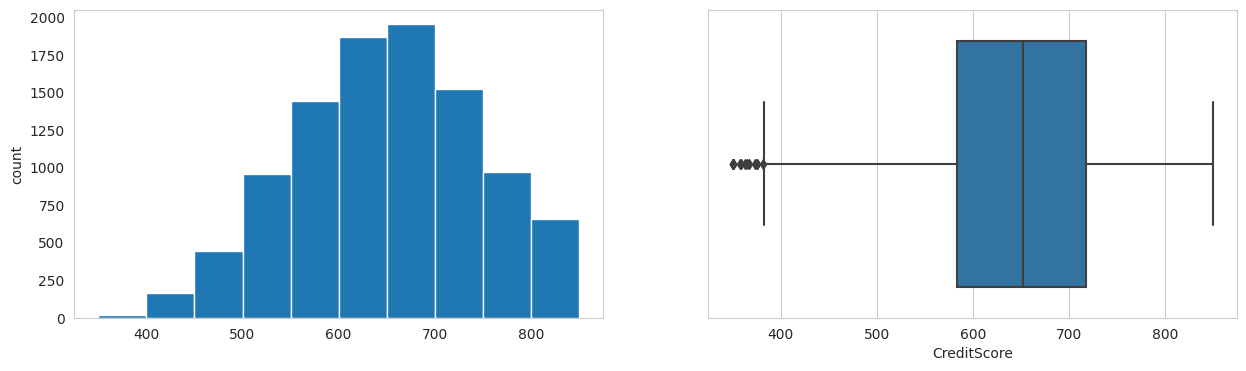

Age
Skew : 1.01


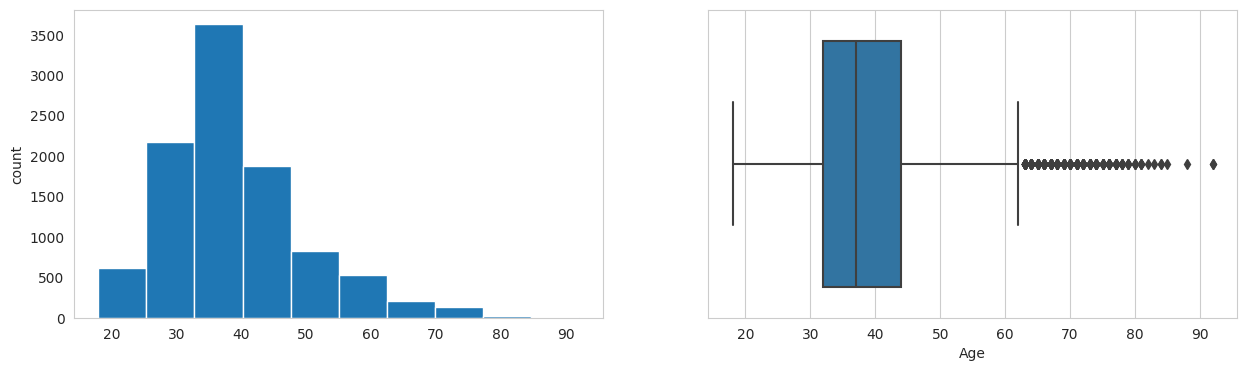

Tenure
Skew : 0.01


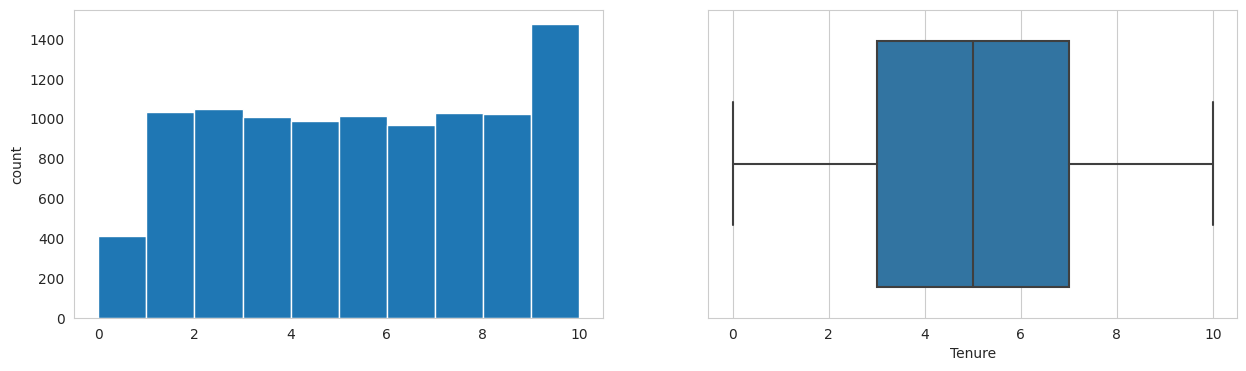

Balance
Skew : -0.14


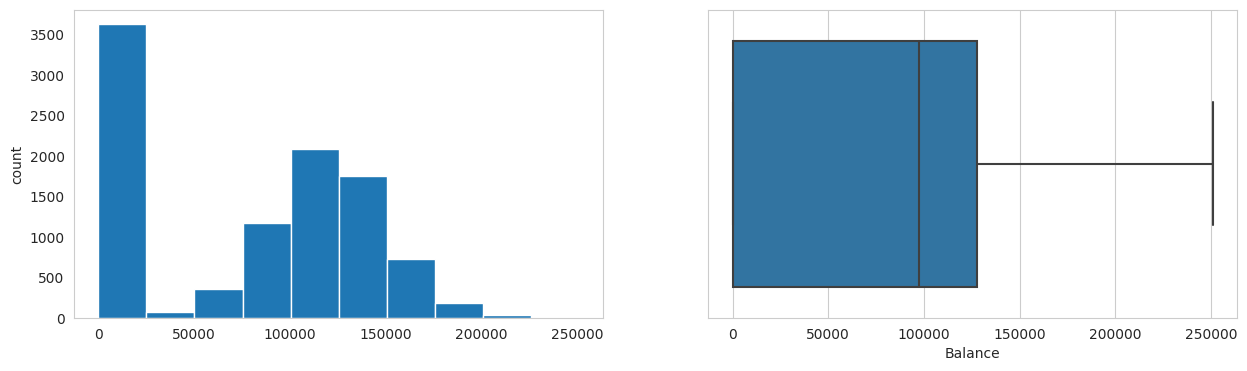

NumOfProducts
Skew : 0.75


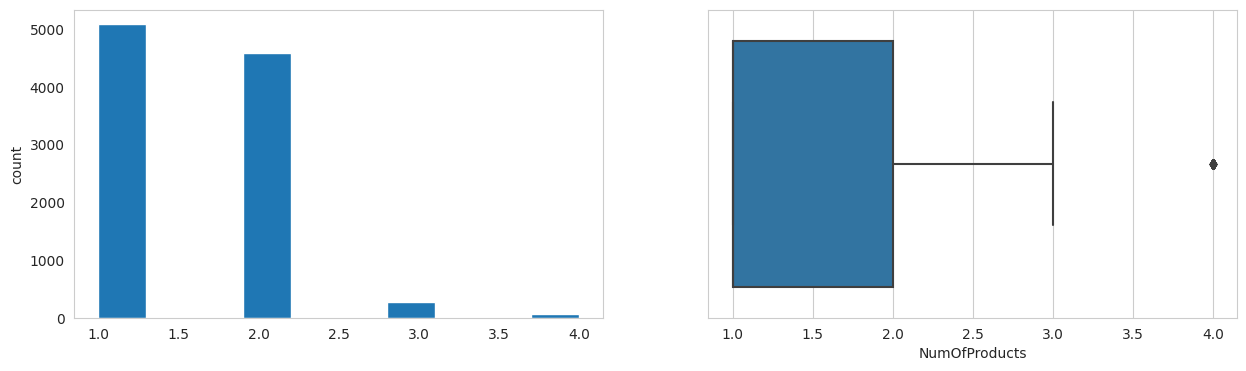

HasCrCard
Skew : -0.9


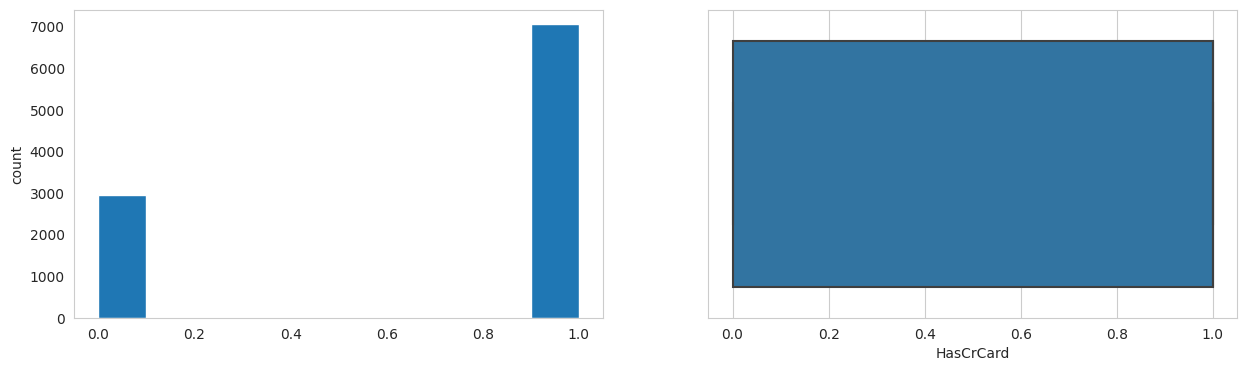

IsActiveMember
Skew : -0.06


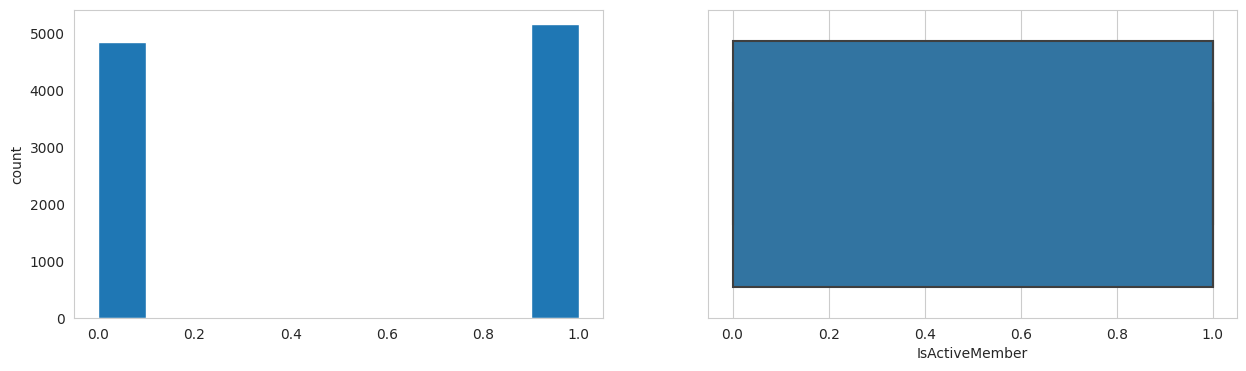

EstimatedSalary
Skew : 0.0


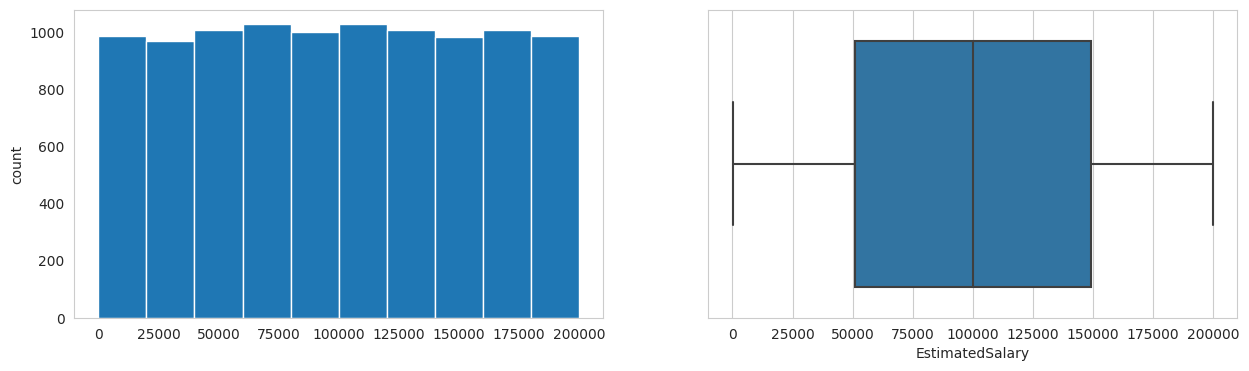

Exited
Skew : 1.47


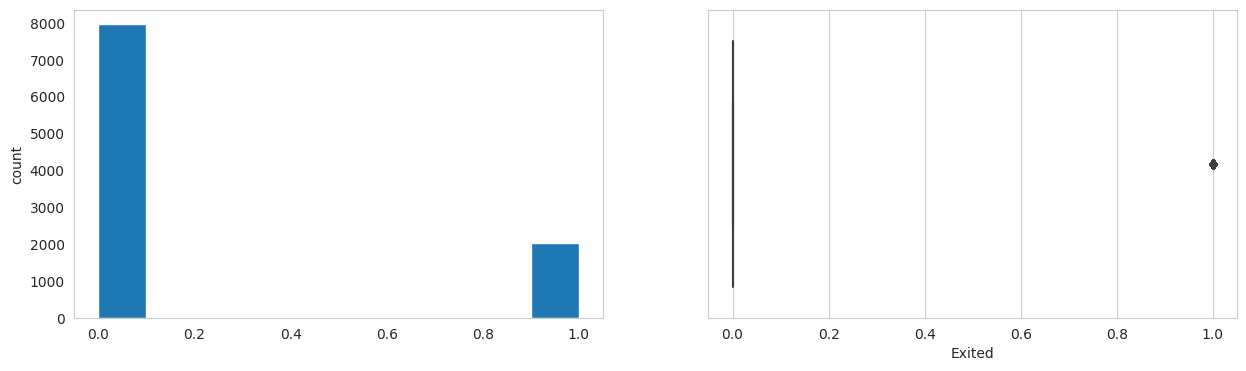

In [15]:
# check for each numerical feature boxplot and skew also we have now two categorical variables
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

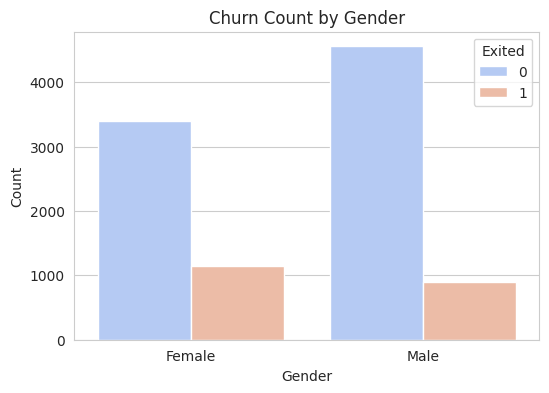

In [16]:



plt.figure(figsize=(6, 4))


sns.countplot(x='Gender', hue='Exited', data=df, palette='coolwarm')

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Count by Gender')

# Show the plot
plt.show()


In [17]:
df['Geography'].value_counts()


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

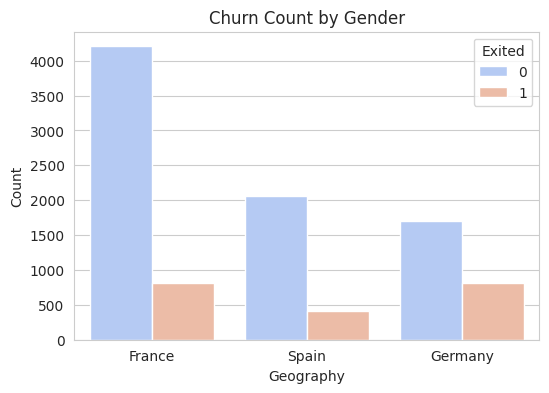

In [18]:


plt.figure(figsize=(6, 4))


sns.countplot(x='Geography', hue='Exited', data=df, palette='coolwarm')

# Set plot labels and title
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Churn Count by Gender')

# Show the plot
plt.show()

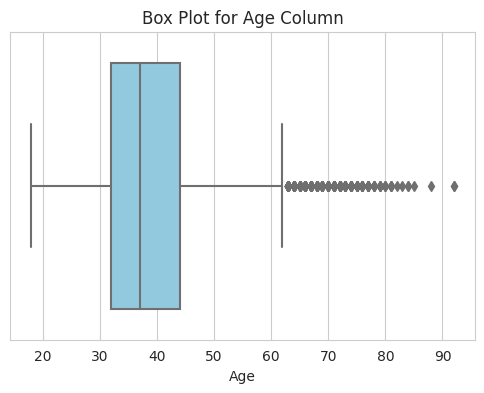

In [19]:


plt.figure(figsize=(6, 4))

sns.boxplot(x=df['Age'], color='skyblue')

plt.xlabel('Age')
plt.title('Box Plot for Age Column')

# Show the plot
plt.show()


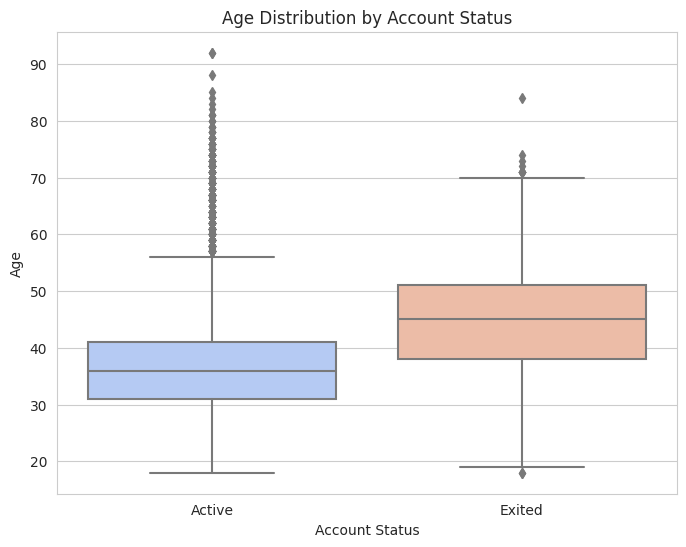

In [20]:

plt.figure(figsize=(8, 6))

sns.boxplot(x='Exited', y='Age', data=df, palette='coolwarm')


plt.xlabel('Account Status')
plt.ylabel('Age')
plt.title('Age Distribution by Account Status')


plt.xticks([0, 1], ['Active', 'Exited'])

# Show the plot
plt.show()


In [21]:
#  drop  Surname,RowNumber and CustomerId
drop_list = [
    "Surname",
    "RowNumber",
    "CustomerId",

]

df = df.drop(drop_list, axis=1)

In [22]:
df.shape

(10000, 11)

In [23]:
#encode the categorical variable which is gander and Geography
print(df['Gender'].unique())
df['Gender'].value_counts()

['Female' 'Male']


Male      5457
Female    4543
Name: Gender, dtype: int64

In [24]:
df["Gender"] =df["Gender"].map({"Female":0,"Male":1})
df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [25]:
print(df.Gender  .unique())
df['Gender'].value_counts()

[0 1]


1    5457
0    4543
Name: Gender, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Geography_encoded'] = label_encoder.fit_transform(df['Geography'])


In [28]:
df.drop('Geography', axis=1, inplace=True)



In [29]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded
0,619,0,42,2,0.000,1,1,1,101348.880,1,0
1,608,0,41,1,83807.860,1,0,1,112542.580,0,2
2,502,0,42,8,159660.800,3,1,0,113931.570,1,0
3,699,0,39,1,0.000,2,0,0,93826.630,0,0
4,850,0,43,2,125510.820,1,1,1,79084.100,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.000,2,1,0,96270.640,0,0
9996,516,1,35,10,57369.610,1,1,1,101699.770,0,0
9997,709,0,36,7,0.000,1,0,1,42085.580,1,0
9998,772,1,42,3,75075.310,2,1,0,92888.520,1,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_encoded  10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


# Preprocessing of Data
- Train | Test Split, Scalling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop("Exited", axis=1)
y = df["Exited"]

In [32]:
seed = 42

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=seed
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.1, random_state=seed
)


In [34]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val  =  scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [35]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this.")

You can safely ignore this.


In [36]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [37]:
# Get python version
!python --version

Python 3.10.12


In [38]:
import tensorflow as tf

tf.__version__

'2.14.0'

In [39]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [40]:
# all library need to build the model

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

In [41]:
X_train.shape

(7200, 10)

In [42]:
X_test.shape

(2000, 10)

In [43]:
X_val.shape

(800, 10)

In [44]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [46]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=50, epochs=1000, verbose=1
)

Epoch 1/1000
144/144 [==============================] - 2s 4ms/step - loss: 0.5151 - recall: 0.0000e+00 - val_loss: 0.4933 - val_recall: 0.0000e+00
Epoch 2/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.4728 - recall: 0.0041 - val_loss: 0.4663 - val_recall: 0.0245
Epoch 3/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.4533 - recall: 0.0682 - val_loss: 0.4414 - val_recall: 0.1534
Epoch 4/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.4407 - recall: 0.1527 - val_loss: 0.4252 - val_recall: 0.1718
Epoch 5/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.4334 - recall: 0.1868 - val_loss: 0.4177 - val_recall: 0.1963
Epoch 6/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.4224 - recall: 0.2147 - val_loss: 0.4009 - val_recall: 0.2147
Epoch 7/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.4062 - recall: 0.2686 - val_loss: 0.3793 - val_recall: 0.2331
Epoch 8/1000

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                396       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1243 (4.86 KB)
Trainable params: 1243 (4.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.515,0.000,0.493,0.000
1,0.473,0.004,0.466,0.025
2,0.453,0.068,0.441,0.153
3,0.441,0.153,0.425,0.172
4,0.433,0.187,0.418,0.196


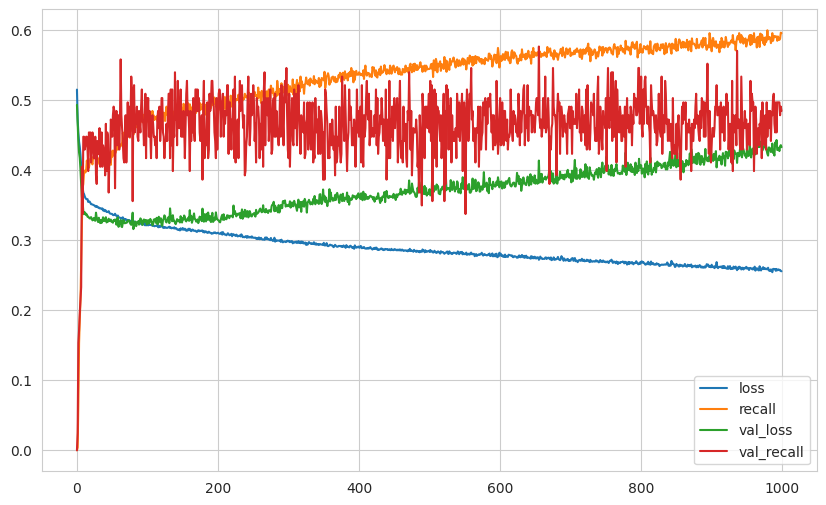

In [49]:
loss_df.plot()
plt.show()

In [51]:
model.evaluate(X_val, y_val, verbose=0)

[0.43292003870010376, 0.48466256260871887]

In [59]:
loss, recall = model.evaluate(X_val, y_val, verbose=0)
print("loss: ", loss)
print("recall: ", recall)


loss:  0.43292003870010376
recall:  0.48466256260871887


In [58]:
y_pred = model.predict(X_val) > 0.5
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

25/25 [==============================] - 0s 3ms/step
[[594  43]
 [ 84  79]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       637
           1       0.65      0.48      0.55       163

    accuracy                           0.84       800
   macro avg       0.76      0.71      0.73       800
weighted avg       0.83      0.84      0.83       800



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [60]:
from sklearn.utils import class_weight

In [61]:
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)

class_weights = {0: class_weights[0] , 1:class_weights[1]}
class_weights


{0: 0.6279434850863422, 1: 2.4539877300613497}

In [62]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [63]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=50, epochs=1000, verbose=1,class_weight=class_weights
)

Epoch 1/1000
144/144 [==============================] - 3s 12ms/step - loss: 0.6875 - recall: 0.0791 - val_loss: 0.6383 - val_recall: 0.3436
Epoch 2/1000
144/144 [==============================] - 1s 5ms/step - loss: 0.6638 - recall: 0.4622 - val_loss: 0.5873 - val_recall: 0.5460
Epoch 3/1000
144/144 [==============================] - 1s 4ms/step - loss: 0.6402 - recall: 0.6012 - val_loss: 0.5851 - val_recall: 0.6626
Epoch 4/1000
144/144 [==============================] - 1s 4ms/step - loss: 0.6032 - recall: 0.6701 - val_loss: 0.5361 - val_recall: 0.6810
Epoch 5/1000
144/144 [==============================] - 1s 4ms/step - loss: 0.5792 - recall: 0.6987 - val_loss: 0.5639 - val_recall: 0.7485
Epoch 6/1000
144/144 [==============================] - 1s 4ms/step - loss: 0.5577 - recall: 0.7082 - val_loss: 0.4961 - val_recall: 0.7301
Epoch 7/1000
144/144 [==============================] - 1s 5ms/step - loss: 0.5376 - recall: 0.7267 - val_loss: 0.4580 - val_recall: 0.7055
Epoch 8/1000
144/14

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                396       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1243 (4.86 KB)
Trainable params: 1243 (4.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.688,0.079,0.638,0.344
1,0.664,0.462,0.587,0.546
2,0.640,0.601,0.585,0.663
3,0.603,0.670,0.536,0.681
4,0.579,0.699,0.564,0.748


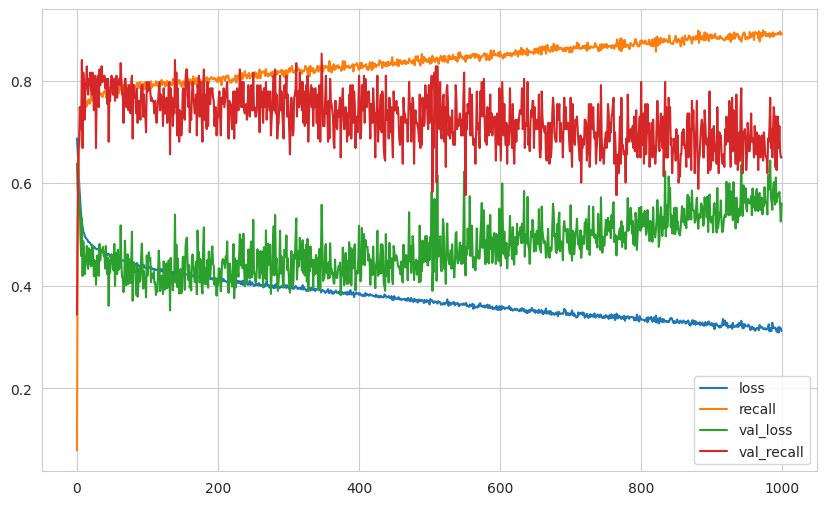

In [66]:
loss_df.plot()
plt.show()

In [67]:
model.evaluate(X_val, y_val, verbose=0)

[0.5606065392494202, 0.650306761264801]

In [68]:
loss, recall = model.evaluate(X_val, y_val, verbose=0)
print("loss: ", loss)
print("recall: ", recall)


loss:  0.5606065392494202
recall:  0.650306761264801


In [69]:
y_pred = model.predict(X_val) > 0.5
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

25/25 [==============================] - 0s 2ms/step
[[522 115]
 [ 57 106]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       637
           1       0.48      0.65      0.55       163

    accuracy                           0.79       800
   macro avg       0.69      0.73      0.71       800
weighted avg       0.82      0.79      0.80       800



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [70]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

### Add Dropout Layer

In [72]:
tf.random.set_seed(seed)
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

### Add Early Stop

In [74]:
from tensorflow.keras.callbacks import EarlyStopping


Monitor the "val_loss" as metric


In [76]:

early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [78]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
225/225 [==============================] - 4s 6ms/step - loss: 0.5406 - recall: 0.0109 - val_loss: 0.5034 - val_recall: 0.0000e+00
Epoch 2/1000
225/225 [==============================] - 2s 7ms/step - loss: 0.5067 - recall: 0.0000e+00 - val_loss: 0.4860 - val_recall: 0.0000e+00
Epoch 3/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4971 - recall: 0.0000e+00 - val_loss: 0.4716 - val_recall: 0.0000e+00
Epoch 4/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4815 - recall: 0.0191 - val_loss: 0.4508 - val_recall: 0.0000e+00
Epoch 5/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4685 - recall: 0.0661 - val_loss: 0.4313 - val_recall: 0.0307
Epoch 6/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4663 - recall: 0.0736 - val_loss: 0.4264 - val_recall: 0.0184
Epoch 7/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4567 - recall: 0.1016 - val_loss: 0.4047 - val_recall: 0.0

<Axes: >

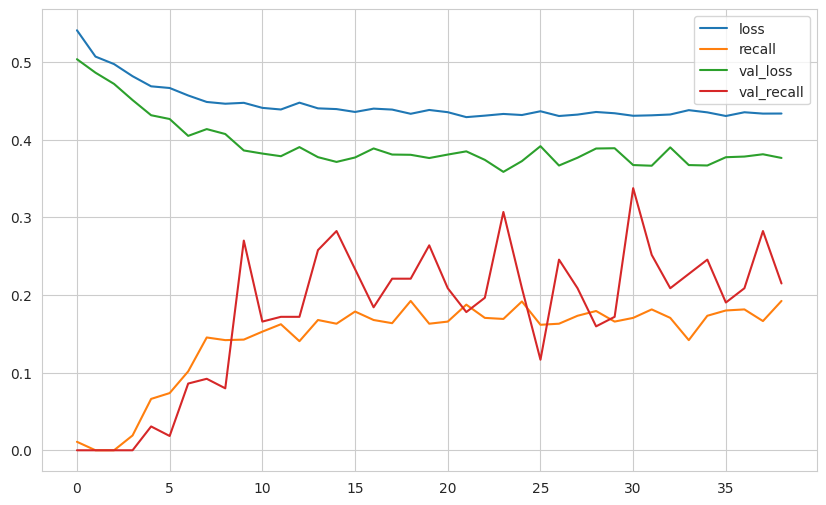

In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [81]:
loss, recall = model.evaluate(X_val, y_val, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.35836970806121826
recall:  0.30674847960472107


In [82]:
y_pred = model.predict(X_val) > 0.5
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

25/25 [==============================] - 0s 2ms/step
[[630   7]
 [113  50]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       637
           1       0.88      0.31      0.45       163

    accuracy                           0.85       800
   macro avg       0.86      0.65      0.68       800
weighted avg       0.85      0.85      0.82       800



#### Monitor the "val_loss" as metric

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

## the reulte before this code


#### Monitor the "val_recall" as metric

In [83]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=15, restore_best_weights=True
)

In [84]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
225/225 [==============================] - 1s 7ms/step - loss: 0.4365 - recall: 0.1718 - val_loss: 0.3878 - val_recall: 0.1963
Epoch 2/1000
225/225 [==============================] - 2s 8ms/step - loss: 0.4339 - recall: 0.1759 - val_loss: 0.3807 - val_recall: 0.1718
Epoch 3/1000
225/225 [==============================] - 1s 5ms/step - loss: 0.4374 - recall: 0.1759 - val_loss: 0.3825 - val_recall: 0.2270
Epoch 4/1000
225/225 [==============================] - 1s 5ms/step - loss: 0.4410 - recall: 0.1554 - val_loss: 0.3661 - val_recall: 0.2638
Epoch 5/1000
225/225 [==============================] - 1s 5ms/step - loss: 0.4330 - recall: 0.1731 - val_loss: 0.3688 - val_recall: 0.2761
Epoch 6/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4312 - recall: 0.1834 - val_loss: 0.3692 - val_recall: 0.2331
Epoch 7/1000
225/225 [==============================] - 1s 5ms/step - loss: 0.4304 - recall: 0.1772 - val_loss: 0.3706 - val_recall: 0.2086
Epoch 8/1000
225/225

<Axes: >

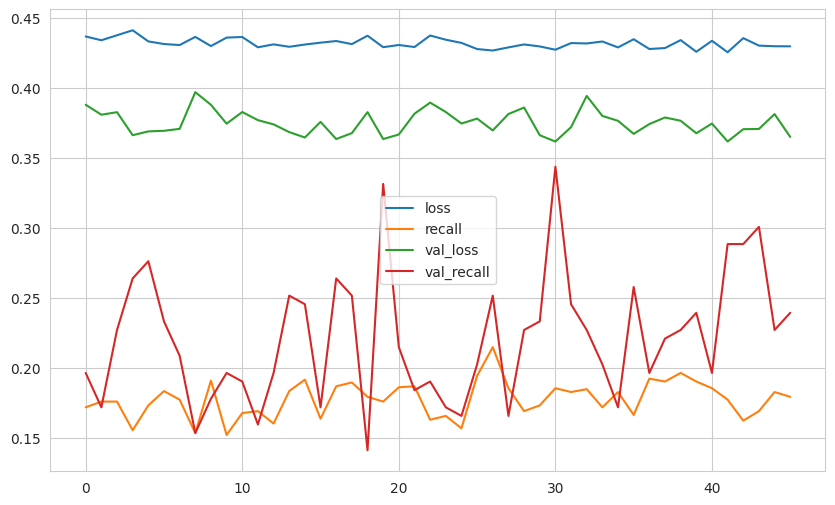

In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [86]:
loss, recall = model.evaluate(X_val, y_val, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.3615221083164215
recall:  0.34355828166007996


In [87]:
y_pred = model.predict(X_val) > 0.5
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

25/25 [==============================] - 0s 2ms/step
[[628   9]
 [107  56]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       637
           1       0.86      0.34      0.49       163

    accuracy                           0.85       800
   macro avg       0.86      0.66      0.70       800
weighted avg       0.86      0.85      0.83       800



## Optuna

In [90]:
pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.7 MB/s eta 0:00:00


In [91]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [92]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [94]:
trial_metric = "Recall"
batch_size = 101


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_val, y_val, verbose=0)[1]
    return score

In [95]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 01:03:48,380] A new study created in memory with name: no-name-6abcefe6-ac12-4c00-834a-45b0e1f25d11
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type type.
  w

Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-30 01:03:57,312] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 90, 'n_units2': 98, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.021607181643507885, 'w0': 2.1522198735661733, 'w1': 0.0147777096448018}. Best is trial 0 with value: 0.0.
[I 2023-10-30 01:04:39,339] Trial 1 finished with value: 0.33128833770751953 and parameters: {'n_units1': 120, 'n_units2': 112, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.018612080025208973, 'w0': 0.25770776273885165, 'w1': 0.5186679030228887}. Best is trial 1 with value: 0.33128833770751953.
[I 2023-10-30 01:05:21,908] Trial 2 finished with value: 0.6441717743873596 and parameters: {'n_units1': 121, 'n_units2': 84, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 3.070629420901248e-05, 'w0': 0.013266891596637142, 'w1': 0.0394492026285036}. Best is trial 2 with value: 0.6441717743873596.


Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2023-10-30 01:05:31,937] Trial 3 finished with value: 0.8220859169960022 and parameters: {'n_units1': 84, 'n_units2': 70, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001600403558186077, 'w0': 0.06840978946565374, 'w1': 0.8379873992016235}. Best is trial 3 with value: 0.8220859169960022.
[I 2023-10-30 01:05:53,443] Trial 4 finished with value: 0.19631901383399963 and parameters: {'n_units1': 122, 'n_units2': 40, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.562052608519413e-05, 'w0': 0.061231988367019895, 'w1': 0.1337804471714509}. Best is trial 3 with value: 0.8220859169960022.
[I 2023-10-30 01:06:18,841] Trial 5 finished with value: 0.8404908180236816 and parameters: {'n_units1': 102, 'n_units2': 104, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.7147093155675082e-05, 'w0': 0.43910197492564257, 'w1': 1.2802363538779147}. Best is trial 5 with value: 0.8404908180236816.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-10-30 01:06:26,369] Trial 6 finished with value: 0.9018405079841614 and parameters: {'n_units1': 39, 'n_units2': 94, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0064187602645786775, 'w0': 0.05409709329014316, 'w1': 0.570147213550061}. Best is trial 6 with value: 0.9018405079841614.


Restoring model weights from the end of the best epoch: 17.
Epoch 32: early stopping


[I 2023-10-30 01:06:38,220] Trial 7 finished with value: 0.0 and parameters: {'n_units1': 59, 'n_units2': 38, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.6913422849044667e-05, 'w0': 3.1012351414360517, 'w1': 0.17656161936474965}. Best is trial 6 with value: 0.9018405079841614.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 01:06:50,536] Trial 8 finished with value: 0.7730061411857605 and parameters: {'n_units1': 63, 'n_units2': 42, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.012747411248201135, 'w0': 0.01184658670721881, 'w1': 0.06547720986733005}. Best is trial 6 with value: 0.9018405079841614.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 01:06:57,131] Trial 9 finished with value: 0.1779141128063202 and parameters: {'n_units1': 72, 'n_units2': 41, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 4.5353078674633686e-05, 'w0': 0.034483089346421386, 'w1': 0.7981000726127465}. Best is trial 6 with value: 0.9018405079841614.


{'n_units1': 39,
 'n_units2': 94,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.0064187602645786775,
 'w0': 0.05409709329014316,
 'w1': 0.570147213550061}

In [97]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
15/15 [==============================] - 5s 104ms/step - loss: 0.5431 - recall: 0.0695 - val_loss: 0.4986 - val_recall: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 28ms/step - loss: 0.4833 - recall: 0.0000e+00 - val_loss: 0.4786 - val_recall: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 28ms/step - loss: 0.4678 - recall: 0.0000e+00 - val_loss: 0.4608 - val_recall: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 22ms/step - loss: 0.4557 - recall: 0.0000e+00 - val_loss: 0.4510 - val_recall: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 22ms/step - loss: 0.4475 - recall: 0.0075 - val_loss: 0.4324 - val_recall: 0.0429
Epoch 6/100
15/15 [==============================] - 0s 19ms/step - loss: 0.4400 - recall: 0.0723 - val_loss: 0.4248 - val_recall: 0.1288
Epoch 7/100
15/15 [==============================] - 0s 21ms/step - loss: 0.4288 - recall: 0.1786 - val_loss: 0.4109 - val_recall: 0.1656
Epoch

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [98]:
history = model.history.history

In [99]:
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

25/25 [==============================] - 0s 2ms/step
[[619  18]
 [ 87  76]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       637
           1       0.81      0.47      0.59       163

    accuracy                           0.87       800
   macro avg       0.84      0.72      0.76       800
weighted avg       0.86      0.87      0.85       800



25/25 [==============================] - 0s 3ms/step


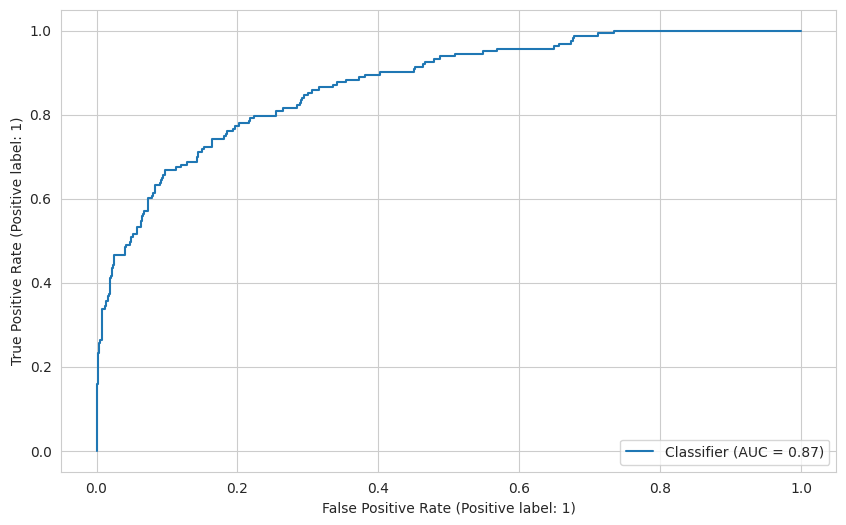

In [100]:
y_pred_proba = model.predict(X_val)
RocCurveDisplay.from_predictions(y_val, y_pred_proba)

In [101]:
roc_auc_score(y_val, y_pred_proba)

0.8719746511157555

# Final Model and Model Deployment

In [102]:
import pickle

pickle.dump(scaler, open("scaler_churn_prediction", "wb"))

In [118]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(39, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(94, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.006)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])



In [120]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=100, restore_best_weights=True
)

In [125]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=80,
    epochs=1000,
    callbacks=[early_stop],
    class_weight={0: 0.05, 1: 0.57},
    verbose=1,

)

Epoch 1/1000
90/90 [==============================] - 2s 18ms/step - loss: 0.0661 - recall: 0.9352 - val_loss: 0.7469 - val_recall: 0.9558
Epoch 2/1000
90/90 [==============================] - 1s 12ms/step - loss: 0.0661 - recall: 0.9305 - val_loss: 0.7411 - val_recall: 0.9484
Epoch 3/1000
90/90 [==============================] - 1s 11ms/step - loss: 0.0651 - recall: 0.9352 - val_loss: 0.7356 - val_recall: 0.9435
Epoch 4/1000
90/90 [==============================] - 1s 13ms/step - loss: 0.0667 - recall: 0.9318 - val_loss: 0.7379 - val_recall: 0.9509
Epoch 5/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0647 - recall: 0.9407 - val_loss: 0.7576 - val_recall: 0.9558
Epoch 6/1000
90/90 [==============================] - 1s 9ms/step - loss: 0.0646 - recall: 0.9325 - val_loss: 0.7194 - val_recall: 0.9410
Epoch 7/1000
90/90 [==============================] - 1s 6ms/step - loss: 0.0652 - recall: 0.9373 - val_loss: 0.7311 - val_recall: 0.9533
Epoch 8/1000
90/90 [==========

<Axes: >

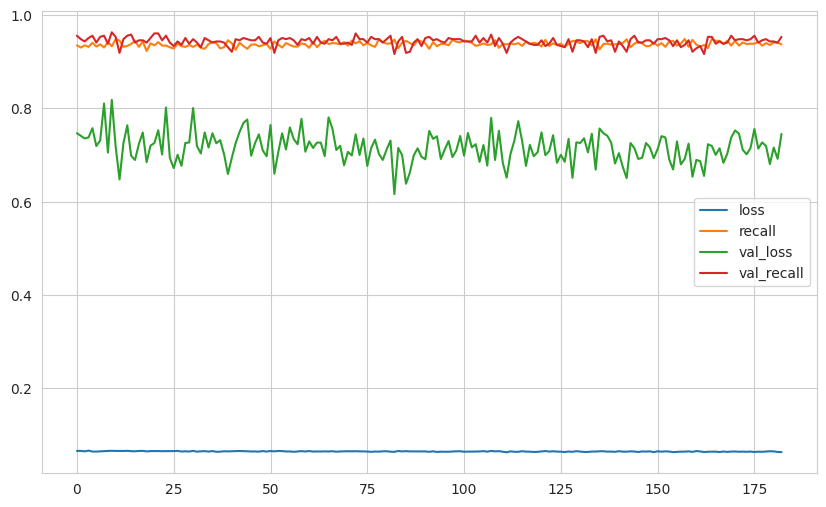

In [130]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [131]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [132]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[830 763]
 [ 34 373]]
              precision    recall  f1-score   support

           0       0.96      0.52      0.68      1593
           1       0.33      0.92      0.48       407

    accuracy                           0.60      2000
   macro avg       0.64      0.72      0.58      2000
weighted avg       0.83      0.60      0.64      2000



In [133]:
# adding smote for unbalanced and to enhance the performance
from imblearn.over_sampling import SMOTE
balanced= SMOTE(sampling_strategy='minority',random_state=seed)

In [134]:
x_train_smote , y_train_smote = balanced.fit_resample(X_train,y_train)

In [135]:
model.fit(
    x=x_train_smote,
    y=y_train_smote,
    validation_data=(X_test, y_test),
    batch_size=80,
    epochs=1000,
    callbacks=[early_stop],
    class_weight={0: 0.05, 1: 0.57},
    verbose=1,

)

Epoch 1/1000
144/144 [==============================] - 1s 4ms/step - loss: 0.0689 - recall: 0.9894 - val_loss: 1.1795 - val_recall: 0.9853
Epoch 2/1000
144/144 [==============================] - 1s 3ms/step - loss: 0.0660 - recall: 0.9935 - val_loss: 1.1558 - val_recall: 0.9779
Epoch 3/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.0659 - recall: 0.9932 - val_loss: 1.2263 - val_recall: 0.9902
Epoch 4/1000
144/144 [==============================] - 1s 4ms/step - loss: 0.0661 - recall: 0.9937 - val_loss: 1.2388 - val_recall: 0.9828
Epoch 5/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.0653 - recall: 0.9922 - val_loss: 1.2642 - val_recall: 0.9926
Epoch 6/1000
144/144 [==============================] - 1s 4ms/step - loss: 0.0648 - recall: 0.9934 - val_loss: 1.1566 - val_recall: 0.9779
Epoch 7/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.0652 - recall: 0.9925 - val_loss: 1.1815 - val_recall: 0.9779
Epoch 8/1000
144/144

<Axes: >

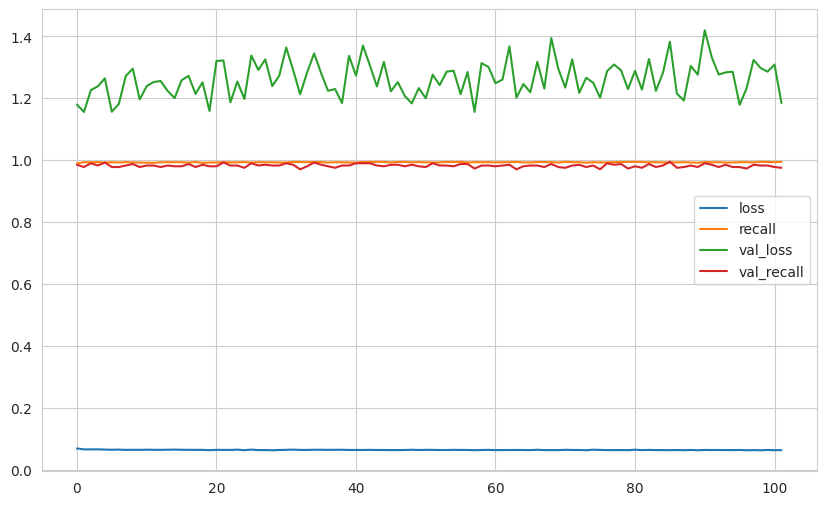

In [136]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [137]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [138]:


y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[ 372 1221]
 [   9  398]]
              precision    recall  f1-score   support

           0       0.98      0.23      0.38      1593
           1       0.25      0.98      0.39       407

    accuracy                           0.38      2000
   macro avg       0.61      0.61      0.38      2000
weighted avg       0.83      0.39      0.38      2000



In [139]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=80,
    epochs=1000,
    callbacks=[early_stop],
    class_weight={0: 0.05, 1: 0.57},
    verbose=1,

)

Epoch 1/1000
90/90 [==============================] - 0s 5ms/step - loss: 0.0681 - recall: 0.9516 - val_loss: 0.7780 - val_recall: 0.9582
Epoch 2/1000
90/90 [==============================] - 0s 4ms/step - loss: 0.0649 - recall: 0.9475 - val_loss: 0.7153 - val_recall: 0.9435
Epoch 3/1000
90/90 [==============================] - 0s 4ms/step - loss: 0.0645 - recall: 0.9448 - val_loss: 0.7327 - val_recall: 0.9533
Epoch 4/1000
90/90 [==============================] - 0s 4ms/step - loss: 0.0654 - recall: 0.9380 - val_loss: 0.7278 - val_recall: 0.9459
Epoch 5/1000
90/90 [==============================] - 0s 4ms/step - loss: 0.0650 - recall: 0.9373 - val_loss: 0.7416 - val_recall: 0.9509
Epoch 6/1000
90/90 [==============================] - 0s 4ms/step - loss: 0.0644 - recall: 0.9387 - val_loss: 0.7123 - val_recall: 0.9484
Epoch 7/1000
90/90 [==============================] - 0s 4ms/step - loss: 0.0658 - recall: 0.9387 - val_loss: 0.7389 - val_recall: 0.9484
Epoch 8/1000
90/90 [==============

<Axes: >

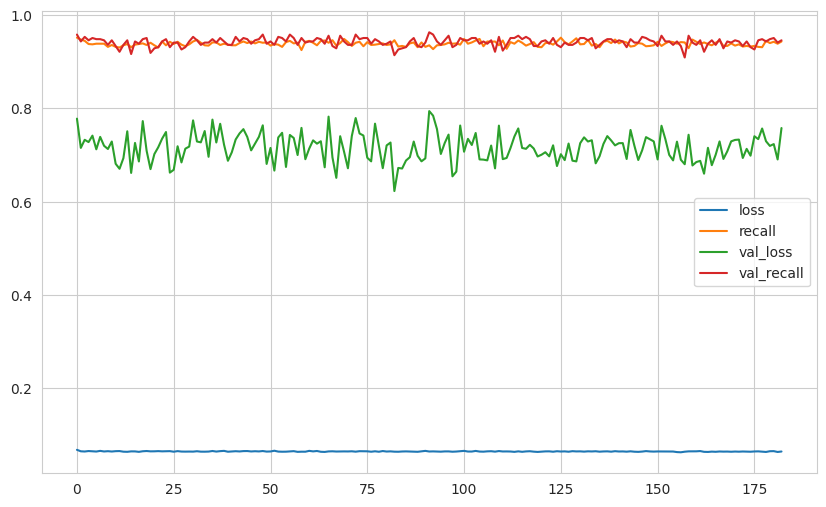

In [140]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()



In [141]:
y_pred = model.predict(X_test)


63/63 [==============================] - 0s 3ms/step


In [142]:

y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[804 789]
 [ 35 372]]
              precision    recall  f1-score   support

           0       0.96      0.50      0.66      1593
           1       0.32      0.91      0.47       407

    accuracy                           0.59      2000
   macro avg       0.64      0.71      0.57      2000
weighted avg       0.83      0.59      0.62      2000



In [143]:
model.save("model_churn_prediction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [144]:
from tensorflow.keras.models import load_model

In [145]:
model_churn_prediction = load_model("model_churn_prediction.h5")
scaler_churn_prediction = pickle.load(open("scaler_churn_prediction", "rb"))

## Prediction

In [151]:
single_customer = df.drop("Exited", axis=1).iloc[0:1, :]
single_customer

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_encoded
0,619,0,42,2,0.000,1,1,1,101348.880,0


In [152]:
single_customer = scaler_churn_prediction.transform(single_customer)
single_customer

array([[0.538     , 0.        , 0.32432432, 0.2       , 0.        ,
        0.        , 1.        , 1.        , 0.50673489, 0.        ]])

In [153]:
model_churn_prediction.predict(single_customer> 0.5).astype("int32")

1/1 [==============================] - 0s 21ms/step


array([[0]], dtype=int32)

In [154]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___